In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
from numpy import array
import math
import cython
import timeit
from matplotlib.pyplot import scatter
%matplotlib notebook

In [2]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (np.tanh(x) ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        return 1. * (x > 0)
    return x * (x > 0)

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
    
def activation_function(x, derivative=False):
    return relu(x, derivative)

In [3]:
class Autoencoder:
    
    def __init__(self, neuron_list):
        self.layer_count = len(neuron_list)
        self.neuron_list = neuron_list
        self.weights = [abs(np.random.randn(y, x)) / 700 for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.biases = [np.zeros((y, 1), dtype=float) for y in neuron_list[1:]]
        self.activations = [np.zeros((x)) for x in neuron_list]
        self.deltas = [np.zeros((x)) for x in neuron_list]
        self.learning_rate = 0.01
        
    def forward_propogation(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i])+self.biases[i])
        return self.activations[-1]
    
    def compute_deltas(self,output_labels):
        # Compute last layers' activations
        for i in range(self.neuron_list[-1]):
            self.deltas[-1][i] = 2*activation_function(self.activations[-1][i],True)*(output_labels[i]-activation_function(self.activations[-1][i]))            
        
        # Compute all deltas in all layers
        # l is layer starting from L-1, ending at 1
        for l in range(self.layer_count-2, 0, -1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.deltas[l][i] = self.deltas[l+1][j]*self.weights[l][j][i]*activation_function(self.activations[l][i],True)
                 
    def back_propogation(self, output_labels):
        # Compute deltas
        self.compute_deltas(output_labels)
        # Update weights 
        # l is layer starting from L-1, ending at 1
        for l in range(0,self.layer_count-1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.weights[l][j][i] += self.learning_rate*self.deltas[l+1][j]*self.activations[l][i]
                 
    def train(self, x, y, epoch):
        error = []
        for e in range(epoch):
            pass_error = 0
            print("Epoch: " + str(e))
            for i in range(len(x)):
                start = timeit.default_timer()
                estimation = self.forward_propogation(x[i])
                #print("Est: " + str(np.transpose(estimation)))
               # print("Out: " + str(np.transpose(y[i])))
                print(" - ")
                pass_error = 100 * np.sum( ((estimation - y[i])**2) / (y[i]**2) ) / len(estimation)
                self.back_propogation(y[i])
                print("Error: " + str(pass_error))
                stop = timeit.default_timer()
                print('Time: ', stop - start)
            error.append(pass_error / len(x))
        return error  


Epoch: 0
 - 
Error: 99.99747758323119
Time:  0.00042357400000003764
 - 
Error: 99.99752078169374
Time:  0.00024119599999994357
 - 
Error: 99.99743556767204
Time:  0.0004089679999998985
 - 
Error: 99.99715802216458
Time:  0.0005041040000000052
 - 
Error: 99.99725269464263
Time:  0.0002925149999999377
 - 
Error: 99.9969886196989
Time:  0.00022185299999999408
 - 
Error: 99.99731409681051
Time:  0.00041962600000000627
 - 
Error: 99.99700573023162
Time:  0.00022895899999997305
 - 
Error: 99.99674844770472
Time:  0.0002261949999999846
 - 
Error: 99.9964544609671
Time:  0.00031620000000009973
 - 
Error: 99.99692941312705
Time:  0.0002561970000001246
 - 
Error: 99.99657673694485
Time:  0.00021751100000000356
 - 
Error: 99.9964348065181
Time:  0.00021119500000010838
 - 
Error: 99.9967880429571
Time:  0.00023488000000004838
 - 
Error: 99.99647212821183
Time:  0.0002561970000001246
 - 
Error: 99.99577867604957
Time:  0.00021277399999997115
 - 
Error: 99.99640561256014
Time:  0.0002289589999999730

Time:  0.0002104059999998853
 - 
Error: 98.51392973547341
Time:  0.000336333000000133
 - 
Error: 98.09573637358578
Time:  0.00023014300000001597
 - 
Error: 98.47738325843058
Time:  0.00021790600000004545
 - 
Error: 98.33340050996226
Time:  0.0003197530000000892
 - 
Error: 98.44534555952681
Time:  0.00023053799999983582
 - 
Error: 98.21515129790018
Time:  0.00026764500000009406
 - 
Error: 98.32354738435444
Time:  0.0002940940000000225
 - 
Error: 98.0410597016452
Time:  0.0002972519999999701
 - 
Error: 98.26610991365806
Time:  0.00022856399999993116
 - 
Error: 98.1606395945993
Time:  0.00021277399999997115
 - 
Error: 97.89575739883212
Time:  0.0002858040000000006
 - 
Error: 97.80558446066122
Time:  0.0002179049999999627
 - 
Error: 97.52588242457274
Time:  0.0003505440000000082
 - 
Error: 97.96418515400327
Time:  0.00025146000000009217
 - 
Error: 97.98826719736618
Time:  0.00021672200000000252
 - 
Error: 97.94784535178567
Time:  0.000212380000000012
 - 
Error: 97.76701906191944
Time:  0.0

 - 
Error: 39.164884025860104
Time:  0.05785277600000005
 - 
Error: 44.4917385678457
Time:  0.0003955460000000244
 - 
Error: 34.95052047458327
Time:  0.0002786990000001044
 - 
Error: 37.26321812627221
Time:  0.00031462200000009766
 - 
Error: 36.85970963173204
Time:  0.00024632800000001787
 - 
Error: 32.772157301013685
Time:  0.0002313270000000589
 - 
Error: 26.120914792710593
Time:  0.00023053799999983582
 - 
Error: 29.770321553883345
Time:  0.000212380000000012
 - 
Error: 33.169663433299576
Time:  0.00032014799999990906
 - 
Error: 34.09595732533282
Time:  0.00042989000000015487
 - 
Error: 32.945795063365814
Time:  0.0006442429999999888
 - 
Error: 30.73823312140197
Time:  0.0002313279999999196
 - 
Error: 31.259344985293303
Time:  0.00021198399999988737
 - 
Error: 34.49962893852492
Time:  0.0004121259999998461
 - 
Error: 24.669764759951228
Time:  0.00023211600000005994
 - 
Error: 26.267874318684314
Time:  0.00021514300000013975
 - 
Error: 26.445279153531477
Time:  0.0002257999999999427


 - 
Error: 0.6719612108386122
Time:  0.00025540800000012354
 - 
Error: 5.130543331924365
Time:  0.0002265900000000265
 - 
Error: 8.007648643014347
Time:  0.0003319910000003645
 - 
Error: 18.488915725475785
Time:  0.00021908999999986634
 - 
Error: 0.5022741353285735
Time:  0.00021198399999988737
 - 
Error: 14.280949248217334
Time:  0.0005597650000002119
 - 
Error: 0.5429272121365591
Time:  0.0002794879999998834
 - 
Error: 3.7315312849951328
Time:  0.0002802770000003285
 - 
Error: 1.4370292657587727
Time:  0.00022501200000002441
 - 
Error: 0.6071553336313102
Time:  0.00020606300000025612
 - 
Error: 0.8822657806334554
Time:  0.0002001419999997367
 - 
Error: 6.425631441181473
Time:  0.00020053700000000063
 - 
Error: 1.1055457822729189
Time:  0.0002238270000001208
 - 
Error: 0.5231693988892517
Time:  0.0002617240000000187
 - 
Error: 2.5790103856538638
Time:  0.0002202740000001313
 - 
Error: 4.649590201937687
Time:  0.000215142000000057
 - 
Error: 0.8984916384387784
Time:  0.0002190899999998

Error: 4.301786672899233
Time:  0.06606332000000004
 - 
Error: 11.51145849061687
Time:  0.00048712999999978024
 - 
Error: 4.773839299242569
Time:  0.0002498809999997853
 - 
Error: 1.804694458705957
Time:  0.0002108000000000665
 - 
Error: 2.923159549067464
Time:  0.0003572539999998625
 - 
Error: 2.822235507465388
Time:  0.0004109419999998032
 - 
Error: 1.9662403422108468
Time:  0.00041488899999997386
 - 
Error: 0.4503285304872484
Time:  0.00037738700000033987
 - 
Error: 5.20210899658283
Time:  0.0003631759999995765
 - 
Error: 10.510634749070462
Time:  0.0005720029999998211
 - 
Error: 0.7120451001259539
Time:  0.00022817000000019405
 - 
Error: 1.5764835048030015
Time:  0.0002565919999999444
 - 
Error: 17.170300575046927
Time:  0.000559369999999948
 - 
Error: 1.1441563470125569
Time:  0.000329226999999932
 - 
Error: 4.058746526635812
Time:  0.0005680550000000117
 - 
Error: 2.020992490238349
Time:  0.00047410300000017003
 - 
Error: 26.35725347845577
Time:  0.000268040000000358
 - 
Error: 0

 - 
Error: 14.181499239554507
Time:  0.0006912189999996876
 - 
Error: 0.1853426257684575
Time:  0.0008005669999997522
 - 
Error: 2.851995556712632
Time:  0.00047844500000016055
 - 
Error: 9.237521536334741
Time:  0.0005712130000001814
 - 
Error: 2.1915505438079768
Time:  0.00046699700000019106
 - 
Error: 0.2549892443258826
Time:  0.0006367429999998286
 - 
Error: 3.300817522448406
Time:  0.00047410300000017003
 - 
Error: 0.1992992689788375
Time:  0.0006245050000002195
 - 
Error: 2.82948057893344
Time:  0.00046502399999992505
 - 
Error: 1.490603063699544
Time:  0.0005506859999999669
 - 
Error: 1.0559291938541528
Time:  0.0005577910000003072
 - 
Error: 5.320160539730681
Time:  0.0004922619999998545
 - 
Error: 7.524414326014893
Time:  0.00027277700000016836
 - 
Error: 52.540128531127536
Time:  0.00032448999999967754
 - 
Error: 16.97220050125281
Time:  0.0005009469999999183
 - 
Error: 2.0283601554433024
Time:  0.0002289590000001951
 - 
Error: 0.5211806786404531
Time:  0.00021395900000031887

Error: 3.293371224911718
Time:  0.04888903599999983
 - 
Error: 9.441830722168929
Time:  0.0006098990000000803
 - 
Error: 1.10573541304313
Time:  0.00023014300000001597
 - 
Error: 3.062437242995262
Time:  0.0003252800000002054
 - 
Error: 3.083640520006168
Time:  0.000298436000000013
 - 
Error: 9.17077169873273
Time:  0.000213168999999791
 - 
Error: 0.26981658494905375
Time:  0.00023724899999999494
 - 
Error: 22.120021104608323
Time:  0.00021948500000013027
 - 
Error: 33.08237813139092
Time:  0.0002601449999999339
 - 
Error: 6.608932053371926
Time:  0.00023093300000009975
 - 
Error: 3.1264224662676523
Time:  0.0002159320000001408
 - 
Error: 1.65394136364517
Time:  0.00021316800000015235
 - 
Error: 3.3639848956415546
Time:  0.0003035670000000046
 - 
Error: 3.839599899286742
Time:  0.00023211699999992064
 - 
Error: 3.2147390050220594
Time:  0.00021159000000015027
 - 
Error: 1.6213721352448054
Time:  0.00020961599999980152
 - 
Error: 14.0676020019437
Time:  0.0002956730000001073
 - 
Error: 

 - 
Error: 1.652716158567526
Time:  0.0009209669999998837
 - 
Error: 0.6414005769053023
Time:  0.00022738000000011027
 - 
Error: 6.020299557363466
Time:  0.0002396170000000808
 - 
Error: 8.644488109632414
Time:  0.000298436000000013
 - 
Error: 19.582667174620145
Time:  0.00024514399999997494
 - 
Error: 0.38322376211467624
Time:  0.0002313279999999196
 - 
Error: 15.823370505187972
Time:  0.00022777499999993012
 - 
Error: 0.5962732507920171
Time:  0.0002159320000001408
 - 
Error: 4.081208277469561
Time:  0.0005423960000001671
 - 
Error: 1.4705302890425698
Time:  0.0002281690000001113
 - 
Error: 0.5752542799900667
Time:  0.0002159320000001408
 - 
Error: 0.9185639451653991
Time:  0.00030909499999998147
 - 
Error: 6.832367933901377
Time:  0.0004480490000000614
 - 
Error: 1.233586644790719
Time:  0.000986496999999975
 - 
Error: 0.4083938797724022
Time:  0.0004946299999999404
 - 
Error: 2.9380546113576074
Time:  0.0004543649999999566
 - 
Error: 5.192446942675997
Time:  0.00022106300000013235


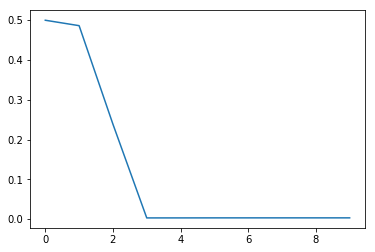

In [4]:
xx = np.array([8, 20])
yy = np.array([3, 15])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.5         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 200).T

xx = np.array([10, 50])
yy = np.array([4, 30])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.7       # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m2 = np.random.multivariate_normal(means, covs, 200).T

inp = []
for i in range(200):
    a1 =  [m2[0][i],  m[1][i]]
    a2 =  [m[0][i],  m2[1][i]]
    a3 = a1 + a2
    a3 /= np.linalg.norm(a3)
    inp.append(np.transpose([a3]))
    
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = Autoencoder(neuron_list)
err = nn.train(inp,inp, 10)
plt.plot(err)
plt.show()

